In [ ]:
import pandas as pd

import numpy as np

import tensorflow as tf

import pandas as pd

from tensorflow.keras.models import Sequential, Model

from tensorflow.keras.layers import concatenate, Input, Dense, Dropout, BatchNormalization, Flatten

from tensorflow.keras import utils

from tensorflow.keras.optimizers import Adam, Adadelta, Adagrad

from tensorflow.keras.preprocessing.text import Tokenizer

from keras.callbacks import  ReduceLROnPlateau,  EarlyStopping , ModelCheckpoint

from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error, mean_absolute_error

import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#Загружаем дата сет с переменную
data = pd.read_excel('/content/drive/MyDrive/Учеба УИИ/Project Train/DataSet 2022.xlsx')


In [ ]:
data.head()

,Column1,#тип,Номер,Секция,Год,TOTAL,TOTAL_1,TOTAL_2,TOTAL_3,TOTAL_4,...,Ю-УР_1,Ю-УР_2,Ю-УР_3,Ю-УР_4,Кол-во пар,"Пробег, км","Износ, мм","Период, дн",Износ мм/10000км,Unnamed: 83
0,0,253,1,1,2022,158342.725,103319.742,14237.184,27594.725,13191.074,...,0.0,0.0,0.0,0.0,4,570284.0,22.80,1092,0.399801,NaN
1,1,253,1,2,2022,158342.725,103319.742,14237.184,27594.725,13191.074,...,0.0,0.0,0.0,0.0,4,489147.2,18.60,932,0.380254,NaN
2,2,253,1,3,2022,158342.725,103319.742,14237.184,27594.725,13191.074,...,0.0,0.0,0.0,0.0,4,460390.0,14.35,879,0.311692,NaN
3,3,253,2,1,2022,153480.470,99361.804,15819.046,24543.299,13756.321,...,0.0,0.0,0.0,0.0,4,532528.0,13.20,1266,0.247874,NaN
4,4,253,2,2,2022,153480.470,99361.804,15819.046,24543.299,13756.321,...,0.0,0.0,0.0,0.0,4,532528.0,8.55,1266,0.160555,NaN


In [ ]:
#Удалим неиспользуемый последний столбец
data_2 = data.copy()
data_2 = data.drop(data.columns[[-1]], axis=1)

In [ ]:
data_2.head()

,Column1,#тип,Номер,Секция,Год,TOTAL,TOTAL_1,TOTAL_2,TOTAL_3,TOTAL_4,...,Ю-ВОСТ_4,Ю-УР_1,Ю-УР_2,Ю-УР_3,Ю-УР_4,Кол-во пар,"Пробег, км","Износ, мм","Период, дн",Износ мм/10000км
0,0,253,1,1,2022,158342.725,103319.742,14237.184,27594.725,13191.074,...,0.0,0.0,0.0,0.0,0.0,4,570284.0,22.80,1092,0.399801
1,1,253,1,2,2022,158342.725,103319.742,14237.184,27594.725,13191.074,...,0.0,0.0,0.0,0.0,0.0,4,489147.2,18.60,932,0.380254
2,2,253,1,3,2022,158342.725,103319.742,14237.184,27594.725,13191.074,...,0.0,0.0,0.0,0.0,0.0,4,460390.0,14.35,879,0.311692
3,3,253,2,1,2022,153480.470,99361.804,15819.046,24543.299,13756.321,...,0.0,0.0,0.0,0.0,0.0,4,532528.0,13.20,1266,0.247874
4,4,253,2,2,2022,153480.470,99361.804,15819.046,24543.299,13756.321,...,0.0,0.0,0.0,0.0,0.0,4,532528.0,8.55,1266,0.160555


In [ ]:
#РАБОТА С ДАТАСЕТОМ

data_2.columns = data_2.columns.str.replace(' ', '_') #Заменим пробелы в названиях столбцов на знак "_"
print(data_2.columns) #Смотрим что получилось


Index(['Column1', '#тип', 'Номер', 'Секция', 'Год', 'TOTAL', 'TOTAL_1',
       'TOTAL_2', 'TOTAL_3', 'TOTAL_4', 'RES_1', 'RES_2', 'RES_3', 'RES_4',
       'В-СИБ_1', 'В-СИБ_2', 'В-СИБ_3', 'В-СИБ_4', 'ГОРЬК_1', 'ГОРЬК_2',
       'ГОРЬК_3', 'ГОРЬК_4', 'ДВОСТ_1', 'ДВОСТ_2', 'ДВОСТ_3', 'ДВОСТ_4',
       'З-СИБ_1', 'З-СИБ_2', 'З-СИБ_3', 'З-СИБ_4', 'ЗАБ_1', 'ЗАБ_2', 'ЗАБ_3',
       'ЗАБ_4', 'КБШ_1', 'КБШ_2', 'КБШ_3', 'КБШ_4', 'КЛНГ_1', 'КЛНГ_2',
       'КЛНГ_3', 'КЛНГ_4', 'КРАС_1', 'КРАС_2', 'КРАС_3', 'КРАС_4', 'МОСК_1',
       'МОСК_2', 'МОСК_3', 'МОСК_4', 'ОКТ_1', 'ОКТ_2', 'ОКТ_3', 'ОКТ_4',
       'ПРИВ_1', 'ПРИВ_2', 'ПРИВ_3', 'ПРИВ_4', 'С-КАВ_1', 'С-КАВ_2', 'С-КАВ_3',
       'С-КАВ_4', 'СВЕРД_1', 'СВЕРД_2', 'СВЕРД_3', 'СВЕРД_4', 'СЕВ_1', 'СЕВ_2',
       'СЕВ_3', 'СЕВ_4', 'Ю-ВОСТ_1', 'Ю-ВОСТ_2', 'Ю-ВОСТ_3', 'Ю-ВОСТ_4',
       'Ю-УР_1', 'Ю-УР_2', 'Ю-УР_3', 'Ю-УР_4', 'Кол-во_пар', 'Пробег,_км',
       'Износ,_мм', 'Период,_дн', 'Износ_мм/10000км'],
      dtype='object')


In [ ]:
#Удаляем не нужные столбцы
data_2 = data_2.drop(columns=['Номер', 'Год','TOTAL','#тип','Секция','Кол-во_пар',
        'RES_1', 'RES_2', 'RES_3', 'RES_4', 'В-СИБ_1',
       'В-СИБ_2', 'В-СИБ_3', 'В-СИБ_4', 'ГОРЬК_1', 'ГОРЬК_2', 'ГОРЬК_3',
       'ГОРЬК_4', 'ДВОСТ_1', 'ДВОСТ_2', 'ДВОСТ_3', 'ДВОСТ_4', 'З-СИБ_1',
       'З-СИБ_2', 'З-СИБ_3', 'З-СИБ_4', 'ЗАБ_1', 'ЗАБ_2', 'ЗАБ_3', 'ЗАБ_4',
       'КБШ_1', 'КБШ_2', 'КБШ_3', 'КБШ_4', 'КЛНГ_1', 'КЛНГ_2', 'КЛНГ_3',
       'КЛНГ_4', 'КРАС_1', 'КРАС_2', 'КРАС_3', 'КРАС_4', 'МОСК_1', 'МОСК_2',
       'МОСК_3', 'МОСК_4', 'ОКТ_1', 'ОКТ_2', 'ОКТ_3', 'ОКТ_4', 'ПРИВ_1',
       'ПРИВ_2', 'ПРИВ_3', 'ПРИВ_4', 'С-КАВ_1', 'С-КАВ_2', 'С-КАВ_3',
       'С-КАВ_4', 'СВЕРД_1', 'СВЕРД_2', 'СВЕРД_3', 'СВЕРД_4', 'СЕВ_1', 'СЕВ_2',
       'СЕВ_3', 'СЕВ_4', 'Ю-ВОСТ_1', 'Ю-ВОСТ_2', 'Ю-ВОСТ_3', 'Ю-ВОСТ_4',
       'Ю-УР_1', 'Ю-УР_2', 'Ю-УР_3', 'Ю-УР_4',
       ], errors='ignore')


In [ ]:
#Выведим получившиюся таблицу
data_2

In [ ]:
print(data_2.head())
print(data_2.columns)

   Column1     TOTAL_1    TOTAL_2    TOTAL_3    TOTAL_4  Кол-во_пар  \
0        0  103319.742  14237.184  27594.725  13191.074           4   
1        1  103319.742  14237.184  27594.725  13191.074           4   
2        2  103319.742  14237.184  27594.725  13191.074           4   
3        3   99361.804  15819.046  24543.299  13756.321           4   
4        4   99361.804  15819.046  24543.299  13756.321           4   

   Пробег,_км  Износ,_мм  Период,_дн Износ_мм/10000км  
0    570284.0      22.80        1092         0.399801  
1    489147.2      18.60         932         0.380254  
2    460390.0      14.35         879         0.311692  
3    532528.0      13.20        1266         0.247874  
4    532528.0       8.55        1266         0.160555  
Index(['Column1', 'TOTAL_1', 'TOTAL_2', 'TOTAL_3', 'TOTAL_4', 'Кол-во_пар',
       'Пробег,_км', 'Износ,_мм', 'Период,_дн', 'Износ_мм/10000км'],
      dtype='object')


In [ ]:
#Избавились от пустых значений в датастете
data_2 = data_2.loc[~data_2['Пробег,_км'].isin([0])]
data_2 = data_2.loc[~data_2['Износ,_мм'].isin([0])]

In [ ]:
data_2

,Column1,TOTAL_1,TOTAL_2,TOTAL_3,TOTAL_4,Кол-во_пар,"Пробег,_км","Износ,_мм","Период,_дн",Износ_мм/10000км
0,0,103319.742,14237.184,27594.725,13191.074,4,570284.0,22.80,1092,0.399801
1,1,103319.742,14237.184,27594.725,13191.074,4,489147.2,18.60,932,0.380254
2,2,103319.742,14237.184,27594.725,13191.074,4,460390.0,14.35,879,0.311692
3,3,99361.804,15819.046,24543.299,13756.321,4,532528.0,13.20,1266,0.247874
4,4,99361.804,15819.046,24543.299,13756.321,4,532528.0,8.55,1266,0.160555
...,...,...,...,...,...,...,...,...,...,...
5236,5236,63661.721,162.382,2427.385,3374.860,6,388836.0,21.00,690,0.540073
5237,5237,63174.591,164.484,2529.187,3400.676,6,383178.0,15.25,672,0.397987
5238,5238,63174.591,164.484,2529.187,3400.676,6,383178.0,17.25,672,0.450182
5239,5239,65066.474,146.196,2221.838,3202.754,6,385554.0,15.75,690,0.408503


In [ ]:
print(data_2.shape)
print(data_2.size)


(5039, 10)
50390


In [ ]:

#Увеличели влияние кривезны дороги на износ
data_2['TOTAL_1'] = data_2['TOTAL_1'].multiply(1)
data_2['TOTAL_2'] = data_2['TOTAL_2'].multiply(2)
data_2['TOTAL_3'] = data_2['TOTAL_3'].multiply(1.5)
data_2['TOTAL_4'] = data_2['TOTAL_4'].multiply(1.75)


In [ ]:
data_2

,Column1,TOTAL_1,TOTAL_2,TOTAL_3,TOTAL_4,Кол-во_пар,"Пробег,_км","Износ,_мм","Период,_дн",Износ_мм/10000км
0,0,103319.742,28474.368,41392.0875,23084.37950,4,570284.0,22.80,1092,0.399801
1,1,103319.742,28474.368,41392.0875,23084.37950,4,489147.2,18.60,932,0.380254
2,2,103319.742,28474.368,41392.0875,23084.37950,4,460390.0,14.35,879,0.311692
3,3,99361.804,31638.092,36814.9485,24073.56175,4,532528.0,13.20,1266,0.247874
4,4,99361.804,31638.092,36814.9485,24073.56175,4,532528.0,8.55,1266,0.160555
...,...,...,...,...,...,...,...,...,...,...
5236,5236,63661.721,324.764,3641.0775,5906.00500,6,388836.0,21.00,690,0.540073
5237,5237,63174.591,328.968,3793.7805,5951.18300,6,383178.0,15.25,672,0.397987
5238,5238,63174.591,328.968,3793.7805,5951.18300,6,383178.0,17.25,672,0.450182
5239,5239,65066.474,292.392,3332.7570,5604.81950,6,385554.0,15.75,690,0.408503


In [ ]:
data_3 = data_2.copy()

In [ ]:
max_deterioration = data_3['Износ_мм/10000км'].max()
min_deterioration = data_3['Износ_мм/10000км'].min()
print(max_deterioration)
print(min_deterioration)

4.771447657
0.0139712416


In [ ]:
#Вычесляем общий пробег с учетом влияния кривезны
data_3['TOTAL_year'] = round(data_3['TOTAL_1'] + data_3['TOTAL_2'] + data_3['TOTAL_3'] + data_3['TOTAL_4'],2)
data_3

,Column1,TOTAL_1,TOTAL_2,TOTAL_3,TOTAL_4,Кол-во_пар,"Пробег,_км","Износ,_мм","Период,_дн",Износ_мм/10000км,TOTAL_year
0,0,103319.742,28474.368,41392.0875,23084.37950,4,570284.0,22.80,1092,0.399801,196270.58
1,1,103319.742,28474.368,41392.0875,23084.37950,4,489147.2,18.60,932,0.380254,196270.58
2,2,103319.742,28474.368,41392.0875,23084.37950,4,460390.0,14.35,879,0.311692,196270.58
3,3,99361.804,31638.092,36814.9485,24073.56175,4,532528.0,13.20,1266,0.247874,191888.41
4,4,99361.804,31638.092,36814.9485,24073.56175,4,532528.0,8.55,1266,0.160555,191888.41
...,...,...,...,...,...,...,...,...,...,...,...
5236,5236,63661.721,324.764,3641.0775,5906.00500,6,388836.0,21.00,690,0.540073,73533.57
5237,5237,63174.591,328.968,3793.7805,5951.18300,6,383178.0,15.25,672,0.397987,73248.52
5238,5238,63174.591,328.968,3793.7805,5951.18300,6,383178.0,17.25,672,0.450182,73248.52
5239,5239,65066.474,292.392,3332.7570,5604.81950,6,385554.0,15.75,690,0.408503,74296.44


In [ ]:
data_3['deterioration_InYear'] = (data_3['TOTAL_year'] * data_3['Износ_мм/10000км'])/10000 #Вычисляем износ за 2022 год
data_3['deterioration_InYear'] = round(data_3['deterioration_InYear'].astype(float),2) #Меняем тип данных в столюце для выполнения расчетов
data_3['Износ_мм/10000км'] = round(data_3['Износ_мм/10000км'].astype(float),2) #Меняем тип данных в столюце для выполнения расчетов
max_deterioration = data_3['deterioration_InYear'].max()
min_deterioration = data_3['deterioration_InYear'].min()
print(max_deterioration)
print(min_deterioration)
data_3.sort_values(by='deterioration_InYear')


In [ ]:
#

In [ ]:
#Создадаем финальную таблицу
data_4 = data_3[['TOTAL_year','deterioration_InYear']].copy()
print(data_4.dtypes)
data_4


TOTAL_year              float64
deterioration_InYear    float64
dtype: object


,TOTAL_year,deterioration_InYear
0,196270.58,7.85
1,196270.58,7.46
2,196270.58,6.12
3,191888.41,4.76
4,191888.41,3.08
...,...,...
5236,73533.57,3.97
5237,73248.52,2.92
5238,73248.52,3.30
5239,74296.44,3.04


array([[<Axes: title={'center': 'deterioration_InYear'}>]], dtype=object)

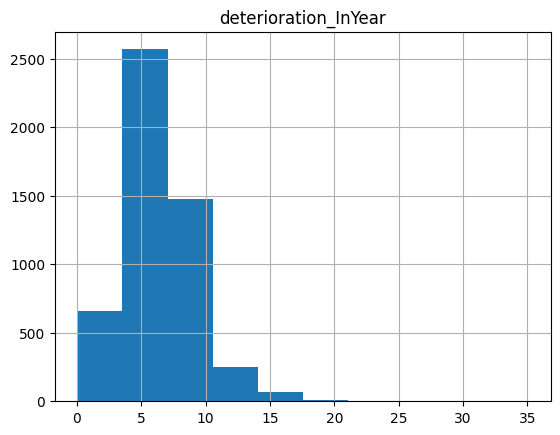

In [ ]:
#Смотрим распределения данных
data_4.hist (column='deterioration_InYear')

In [ ]:
'''
#Выделим тестовыу выборку
len_T = int(len(data_4)) - int(len(data_4)/100*20)
print(len_T)
print(type(len_T))
'''

'\n#Выделим тестовыу выборку\nlen_T = int(len(data_4)) - int(len(data_4)/100*20)\nprint(len_T)\nprint(type(len_T))\n'

In [ ]:
#Создаем выборки
xTrain = np.array(data_4['TOTAL_year'])
yTrain = np.array(data_4['deterioration_InYear'])
#xTrain = np.array(data_4['TOTAL_year'][0:len_T])
#yTrain = np.array(data_4['deterioration_InYear'][0:len_T])
#xTest = np.array(data_4['TOTAL_year'][len_T:-1])
#yTest = np.array(data_4['TOTAL_year'][len_T:-1])

In [ ]:
print('Размер обучающей выборки:',xTrain.shape)
print('Размер проверочной выборки:',yTrain.shape)

#print('Размер тестовой выборки:',xTest.shape)
#print('Размер тестовых ответов:',yTest.shape)

Размер обучающей выборки: (5039,)
Размер проверочной выборки: (5039,)


In [ ]:
#Нормализуем данные
print(xTrain[0:5])
print(xTrain.shape)
x_train_scaled = xTrain.reshape(5039,-1)
print(x_train_scaled.shape)
x_scaler = StandardScaler()
x_train_scaled = x_scaler.fit_transform(x_train_scaled)
print(x_train_scaled[0:5])

print(yTrain[0:5])
print(yTrain.shape)
y_train_scaled = yTrain.reshape(5039,-1)
print(y_train_scaled.shape)
y_scaler = StandardScaler()
y_train_scaled = y_scaler.fit_transform(y_train_scaled)
print(y_train_scaled[0:5])

[196270.58 196270.58 196270.58 191888.41 191888.41]
(5039,)
(5039, 1)
[[-0.03612556]
 [-0.03612556]
 [-0.03612556]
 [-0.11354295]
 [-0.11354295]]
[7.85 7.46 6.12 4.76 3.08]
(5039,)
(5039, 1)
[[ 0.51668532]
 [ 0.37904456]
 [-0.09387497]
 [-0.57385301]
 [-1.16676705]]


In [ ]:
#Выделим из обучающей выборки выдидационную
x_train, x_test, y_train, y_test = train_test_split(x_train_scaled,y_train_scaled,test_size=0.3,shuffle = False)


In [ ]:
print(x_train.shape)
#print(x_val.shape)
print(y_train.shape)
#print(y_val.shape)
print(x_test.shape)
print(y_test.shape)
print(y_train)
print(y_test)


(3527, 1)
(3527, 1)
(1512, 1)
(1512, 1)
[[ 0.51668532]
 [ 0.37904456]
 [-0.09387497]
 ...
 [ 0.00141478]
 [-0.30915924]
 [-0.03034847]]
[[-2.12319386]
 [-1.73497634]
 [-1.67144983]
 ...
 [-1.08912354]
 [-1.18088405]
 [-1.04677254]]


In [ ]:
# Визуальная оценка ошибки на обучающей и проверочной выборках

def compare_sharp_loss (history, x_size, y_size):
  plt.figure(figsize=(x_size,y_size))
  plt.plot(history.history['loss'],
         label='Ошибка на обучающей выборке')


  plt.plot(history.history['val_loss'],
         label='Ошибка проверочном наборе')
  plt.xlabel('Эпоха обучения')
  plt.ylabel('Средняя ошибка')
  plt.legend()
  plt.show()

In [ ]:

def check_MAE_predictl_DubbleInput (model,
                                    x_data,
                                    y_data,
                                    plot=False):

  mae = 0 # Инициализируем начальное значение ошибки
  x_pred = x_scaler.inverse_transform(x_data)
  y_pred = x_scaler.inverse_transform(x_data)
  x_pred =x_pred.predict(x_data)
  y_pred =y_pred.predict(x_data)

  #if y_data.all():
   # print('АНСКАЛ')
    #pred = x_scaler.inverse_transform(model.predict(x_data))
  for n in range (0,len(x_data)):
    print(f'y_data{y_pred[n]} - {x_pred[n]} в {n}')
    mae += abs(y_pred[n] - x_pred[n]) # Увеличиваем значение ошибки для текущего элемента

  mae /= len(x_data) # Считаем среднее значение
  print('Среднаяя абслолютная ошибка {}  это {}% от общей выборки в {} '.format(mae, (mae/y_pred.mean(axis=0))*100,len(x_pred)))
  if plot:
     plt.scatter(y_pred, x_pred)
     plt.xlabel('Правильные значение')
     plt.ylabel('Предсказания')
     plt.axis('equal')
     plt.xlim(plt.xlim())
     plt.ylim(plt.ylim())
     plt.plot([0, 250], [0, 250])
     plt.show()

In [ ]:
# Колбэки
my_callbacks = [
    EarlyStopping(monitor='val_loss',
                        min_delta=0,
                        patience=4,
                        verbose=1,
                        baseline=None,
                        restore_best_weights=True),
    ModelCheckpoint(filepath='model.{epoch:02d}-{val_loss:.2f}.h5'),
    ReduceLROnPlateau(monitor='val_loss', factor=0.6, patience=2, verbose=1)
]


In [ ]:
#Сама нейронка
model = Sequential([
    Dense(1024, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(768, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    #Dense(2000, activation='sigmoid'),
    #Dense(5000, activation='relu'),
    #Dropout(0.3),
    #Dense(2500, activation='sigmoid'),
    Dense(1, activation='linear')
])


#x2 = Dense(400, activation='sigmoid') (input2)
#x2 = BatchNormalization()(x2)
#x2 = Dropout(0.3)(x2)
#x2 = Dense(100, activation='hard_sigmoid') (x2)

#x = concatenate([x1, x2])

#x = Dense(100, activation='relu')(x)
##x = BatchNormalization()(x)
#x = Dropout(0.3)(x)
#x = Dense(50, activation='sigmoid')(x)
#x = Dropout(0.3)(x)
#x = Dense(1, activation='linear')(x)


In [ ]:
model.compile(optimizer=Adam(learning_rate=0.00001), loss='mae', metrics=['mae'])

Epoch 1/100
10/10 [==============================] - 4s 45ms/step - loss: 0.6604 - mae: 0.6604 - val_loss: 2.7568 - val_mae: 2.7568
Epoch 2/100
10/10 [==============================] - 0s 20ms/step - loss: 0.6582 - mae: 0.6582 - val_loss: 3.0408 - val_mae: 3.0408
Epoch 3/100
10/10 [==============================] - 0s 19ms/step - loss: 0.6571 - mae: 0.6571 - val_loss: 3.0909 - val_mae: 3.0909
Epoch 4/100
10/10 [==============================] - 0s 19ms/step - loss: 0.6586 - mae: 0.6586 - val_loss: 3.0383 - val_mae: 3.0383
Epoch 5/100
10/10 [==============================] - 0s 19ms/step - loss: 0.6562 - mae: 0.6562 - val_loss: 3.2170 - val_mae: 3.2170
Epoch 6/100
10/10 [==============================] - 0s 19ms/step - loss: 0.6583 - mae: 0.6583 - val_loss: 3.3906 - val_mae: 3.3906
Epoch 7/100
10/10 [==============================] - 0s 19ms/step - loss: 0.6577 - mae: 0.6577 - val_loss: 3.3274 - val_mae: 3.3274
Epoch 8/100
10/10 [==============================] - 0s 19ms/step - loss: 0.

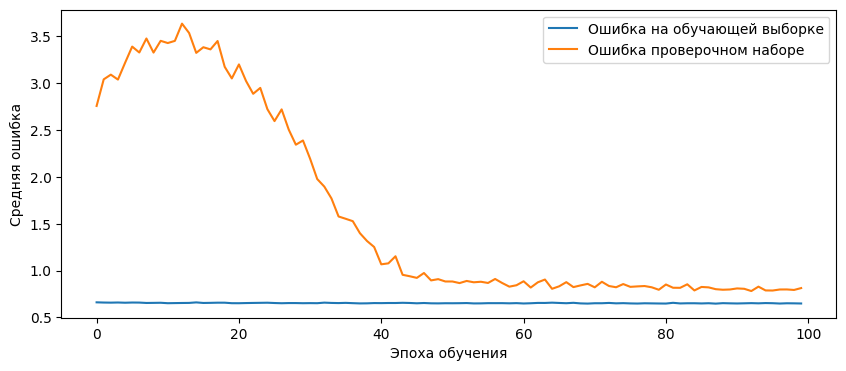

In [ ]:
history = model.fit(x_train, y_train, epochs=100,batch_size=256, validation_split=0.3, verbose=1, shuffle=True)#, callbacks=my_callbacks)
compare_sharp_loss(history,10,4)

In [ ]:
print(x_test[1,0])
print(x_test.mean(),x_test.std())
print(y_test[1,0])
print(y_test.mean(),y_test.std())
#print(x_test_scaled[1,0])
#print(x_test_scaled.mean(),x_test_scaled.std())
#print(y_test_scaled[1,0])
#print(y_test_scaled.mean(),y_test_scaled.std())


1.141930657167948
-1.006841460744312 1.1102499579577427
-1.734976337327127
-0.4274124642208844 0.9820550820058854


In [ ]:
print(y_test[0])
print(x_test[0])

[-2.12319386]
[1.14193066]


NameError: ignored

48/48 [==============================] - 0s 2ms/step
Верное значение [0.37] - предсказанное [0.04922918] в 0 = [0.32077082]
Верное значение [1.47] - предсказанное [0.04922918] в 1 = [1.42077082]
Верное значение [1.65] - предсказанное [0.04922918] в 2 = [1.60077082]
Верное значение [6.85] - предсказанное [0.04293329] в 3 = [6.80706671]
Верное значение [5.65] - предсказанное [0.04293329] в 4 = [5.60706671]
Верное значение [5.29] - предсказанное [0.04293329] в 5 = [5.24706671]
Верное значение [5.31] - предсказанное [0.01945249] в 6 = [5.29054751]
Верное значение [5.2] - предсказанное [0.01945249] в 7 = [5.18054751]
Верное значение [3.98] - предсказанное [0.01945249] в 8 = [3.96054751]
Верное значение [5.8] - предсказанное [0.04983999] в 9 = [5.75016001]
Верное значение [7.35] - предсказанное [0.04983999] в 10 = [7.30016001]
Верное значение [6.04] - предсказанное [0.04983999] в 11 = [5.99016001]
Верное значение [6.11] - предсказанное [0.0258872] в 12 = [6.0841128]
Верное значение [4.49] - 

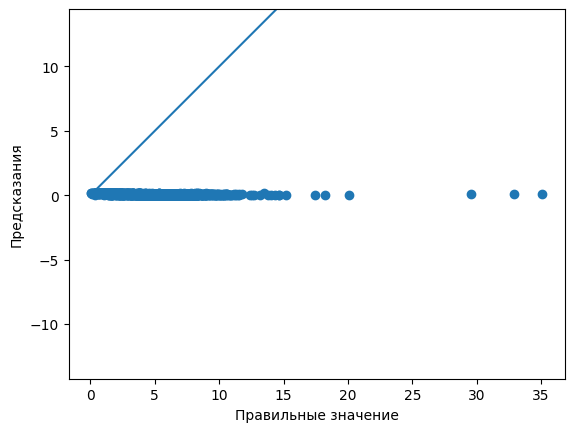

In [ ]:
#Выводим результаты проверти на тестовой выборке
y_not_scal = y_scaler.inverse_transform(y_test)
x_not_scal = x_scaler.inverse_transform(x_test)
x_pred =model.predict(x_test)

for n in range (0,len(x_test)):
    print(f'Верное значение {y_not_scal[n]} - предсказанное {x_pred[n]} в {n} =', y_not_scal[n] - x_pred[n])
plt.scatter(y_not_scal, x_pred)
plt.xlabel('Правильные значение')
plt.ylabel('Предсказания')
plt.axis('equal')
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())
plt.plot([0, 250], [0, 250])
plt.show()

In [ ]:
check_MAE_predictl_DubbleInput(model, x_test, y_test,True)

In [ ]:
#Нормализуем входные данные вручную
'''
print(x_train[0:5])
print(x_train.shape)
x_train_scaled = x_train.reshape(3527,-1)
print(x_train_scaled.shape)
x_scaler = StandardScaler()
x_train_scaled = x_scaler.fit_transform(x_train_scaled)

print(y_train[0:5])
print(y_train.shape)
y_train_scaled = y_train.reshape(3527,-1)
print(y_train_scaled.shape)
y_scaler = StandardScaler()
y_train_scaled = y_scaler.fit_transform(y_train_scaled)

print(x_test[0:5])
print(x_test.shape)
x_test_scaled = x_test.reshape(1512 ,-1)
print(x_test_scaled.shape)
x_test_scaler = StandardScaler()
x_test_scaled = x_test_scaler.fit_transform(x_test_scaled)

print(y_test[0:5])
print(y_test.shape)
y_test_scaled = y_test.reshape(1512 ,-1)
print('y_test_scaled',y_test_scaled.shape)
y_test_scaler = StandardScaler()
y_test_scaled = y_test_scaler.fit_transform(y_test_scaled)
'''

In [ ]:
'''
print(x_train_scaled[1,0])
print(x_train_scaled.mean(),x_train_scaled.std())
print(y_train_scaled[1,0])
print(y_train_scaled.mean(),y_train_scaled.std())
print(x_test_scaled[1,0])
print(x_test_scaled.mean(),x_test_scaled.std())
print(y_test_scaled[1,0])
print(y_test_scaled.mean(),y_test_scaled.std())
'''

In [ ]:
'''
#Линейная регрессия
from sklearn.linear_model import LinearRegression
model_LineR = LinearRegression().fit(x_train, y_train)
sq = model_LineR.score(x_train, y_train)
print('coefficient of determination:', sq)
y_pred_l = model_LineR.predict(x_test)
print('predicted response:', y_pred_l, sep='\n')
'''

coefficient of determination: 0.0009920545080784882
predicted response:
[[0.22345808]
 [0.22345808]
 [0.22345808]
 ...
 [0.03364449]
 [0.03469301]
 [0.03469301]]
